In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [58]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [59]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [60]:
df.shape

(1000, 40)

This dataset contains 1000 records and 40 features.

Let's check for nulls in the dataset.

In [61]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 features has only null values. Let's drop this feature.

In [62]:
df.drop('_c39',axis=1,inplace=True)

Let's check for duplicates in the dataset.

In [63]:
df.duplicated().sum()

0

In [64]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

Duplicates are not present in the dataset.

In [65]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Below are the observations from above information,

For policy_annual_premium feature there is huge difference between 75% and max. So, there can be outliers present in this feature.

For feature policy_deductable mean is greater than 50%. So, data is right skewed.

For  insured_Zip mean is greater than 50%. So data is right skewed. 

For capital gains mean is greater than 50% data. So, data is right skewed. There is huge difference between 75% and max data. SO outliers are present in this feature.

For capital-loss feature mean is less than 50% data. So, data is left skewed.

For total_claim_amount mean is less tha 50% data. So, data is left skewed. There is huge differnce between 75% data and max data. So, outliers are present in this feature.

For injury_claim,property_claim  mean is greater than 50% data. So, data is right skewed. There is huge difference between 75% and max data. So, outliers are present in this feature.

For vehicle claim mean is less than 50% data. So, data is left skewed. There is huge differnce between 75% data and max data. So, outliers are present.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Let's plot graphs and analyse data.

In [67]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [68]:
df['incident_date']=pd.to_datetime(df['incident_date'])
df['incident_day']=df['incident_date'].dt.day
df['incident_month']=df['incident_date'].dt.month
df['incident_year']=df['incident_date'].dt.year
df.drop('incident_date',axis=1,inplace=True)

In [69]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['p0licy_date']=df['policy_bind_date'].dt.day
df['policy_Month']=df['policy_bind_date'].dt.month
df['policy_Year']=df['policy_bind_date'].dt.year
df.drop('policy_bind_date',axis=1,inplace=True)

In [70]:
df.shape

(1000, 43)

In [71]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,incident_day,incident_month,incident_year,p0licy_date,policy_Month,policy_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,25,1,2015,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,21,1,2015,27,6,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,N,22,2,2015,9,6,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,Y,1,10,2015,25,5,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,N,17,2,2015,6,6,2014


In [72]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'incident_day',
       'incident_month', 'incident_year', 'p0licy_date', 'policy_Month',
       'policy_Year'],
      dtype='object')

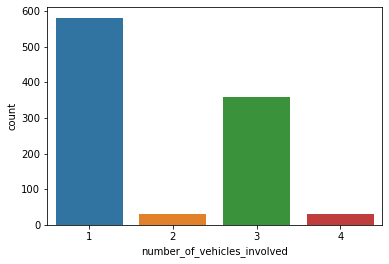

In [73]:
sns.countplot(x='number_of_vehicles_involved',data=df)
plt.show()

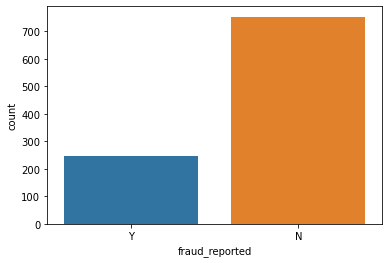

In [74]:
sns.countplot(x='fraud_reported',data=df)
plt.show()

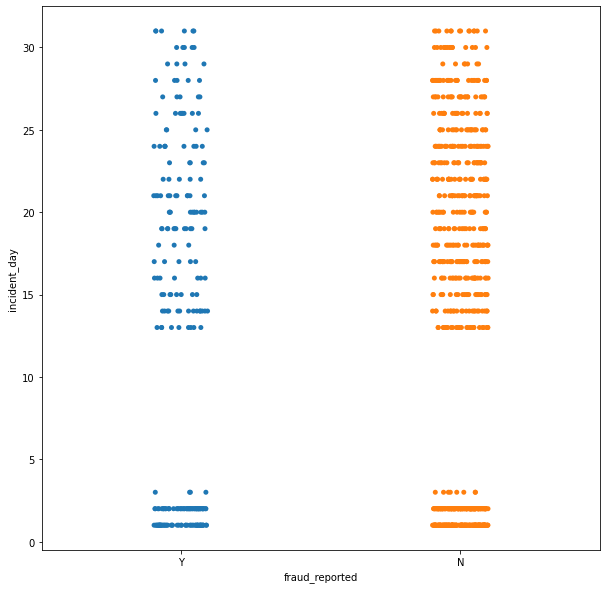

In [75]:
plt.figure(figsize=(10,10))
sns.stripplot(x='fraud_reported',y='incident_day',data=df)
plt.show()

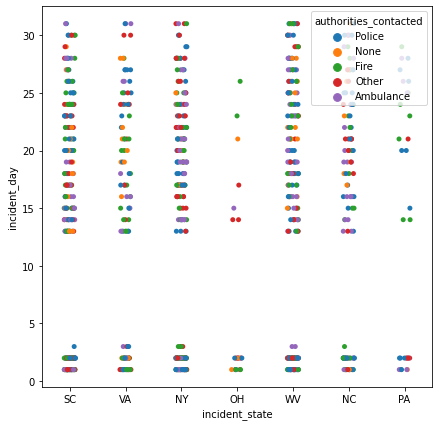

In [76]:
plt.figure(figsize=(7,7))
sns.stripplot(x='incident_state',y='incident_day',data=df,hue='authorities_contacted')
plt.show()

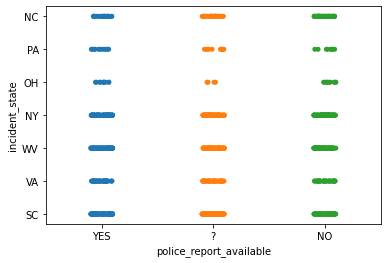

In [77]:
sns.stripplot(x='police_report_available',y='incident_state',data=df)
plt.show()

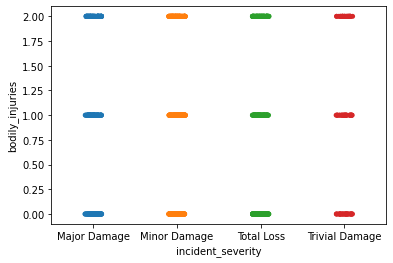

In [78]:
sns.stripplot(x='incident_severity',y='bodily_injuries',data=df)
plt.show()

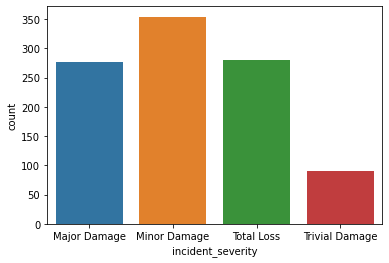

In [79]:
sns.countplot(x='incident_severity',data=df)
plt.show()

In [80]:
numerical_cols=[]
categorical_cols=[]

for i in df.columns:
    if(df[i].dtypes=='object'):
        categorical_cols.append(i)
        
    else:
        numerical_cols.append(i)

In [81]:
categorical_cols

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [82]:
numerical_cols

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'incident_day',
 'incident_month',
 'incident_year',
 'p0licy_date',
 'policy_Month',
 'policy_Year']

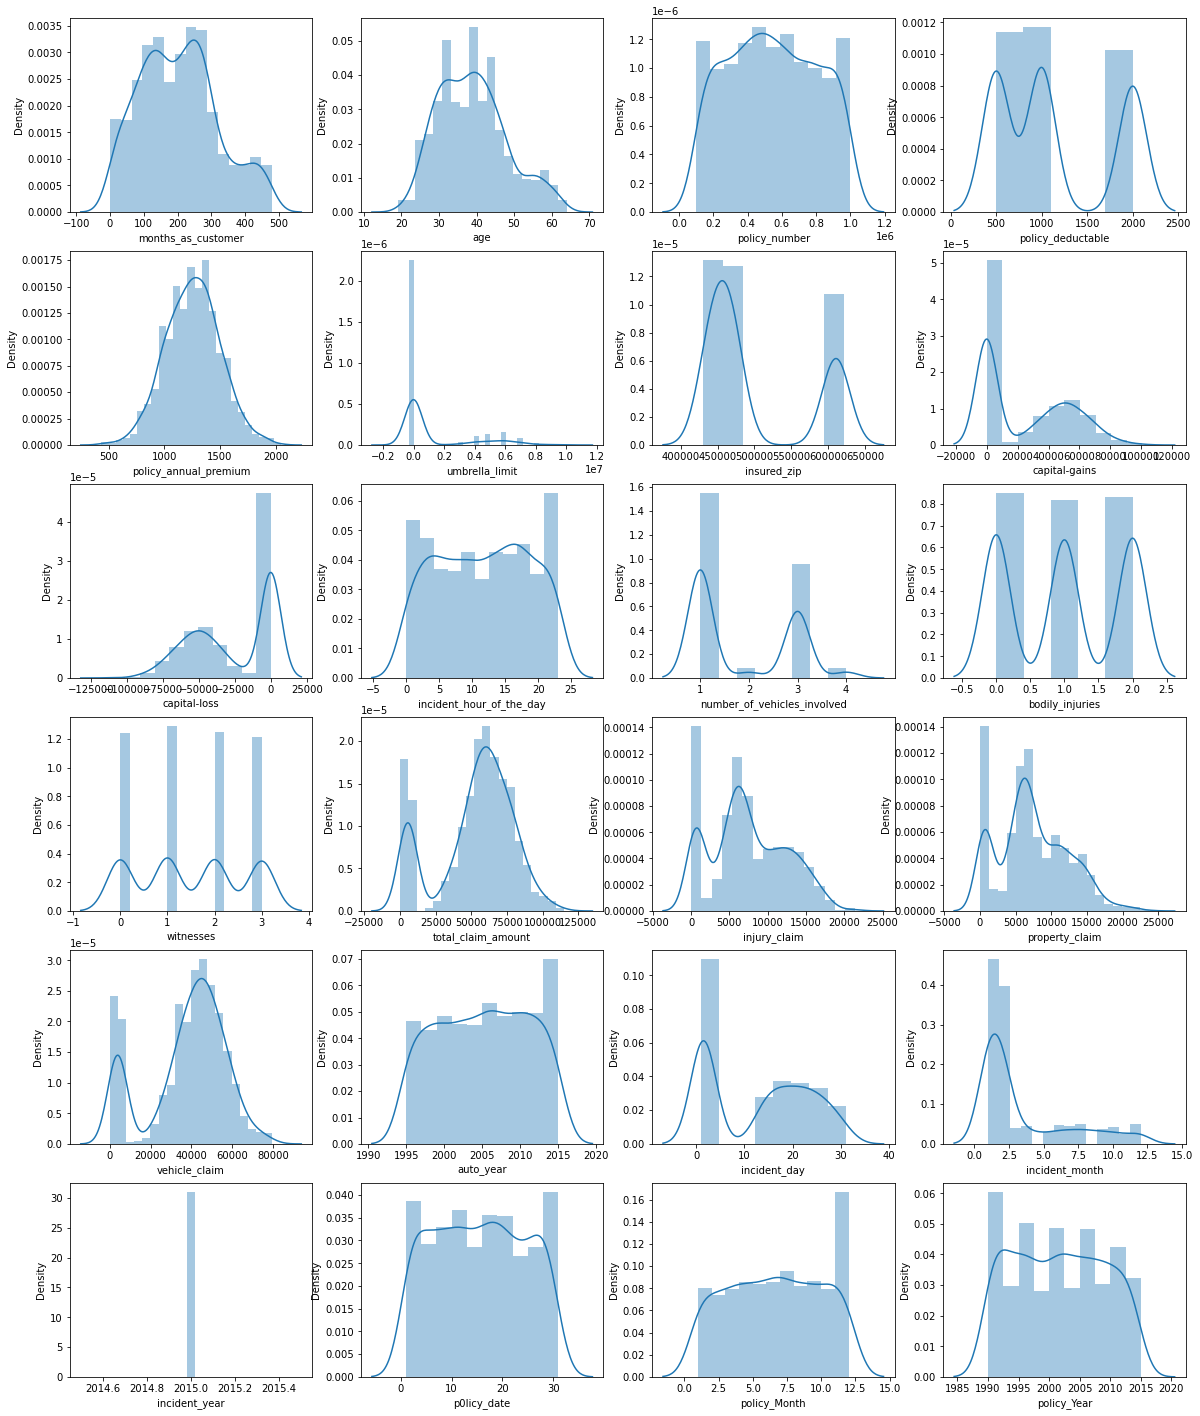

In [83]:

plt.figure(figsize=(20,25))
n=1
for i in numerical_cols:
    ax=plt.subplot(6,4,n)
    sns.distplot(x=df[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

From the above we can observe skeweness in umberella_limit,insure_zip,total_clain_amount,vehicle_claim..

In [84]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
incident_day                   0.059111
incident_month                 1.375894
incident_year                  0.000000
p0licy_date                    0.024372
policy_Month                  -0.029321
policy_Year                    0.052511
dtype: float64

In [85]:


df['umbrella_limit']=np.cbrt(df['umbrella_limit'])
df['umbrella_limit']=np.cbrt(df['umbrella_limit'])
df['umbrella_limit']=np.cbrt(df['umbrella_limit'])

df['insured_zip']=np.cbrt(df['insured_zip'])
df['insured_zip']=np.cbrt(df['insured_zip'])


df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.461835
insured_zip                    0.786558
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
incident_day                   0.059111
incident_month                 1.375894
incident_year                  0.000000
p0licy_date                    0.024372
policy_Month                  -0.029321
policy_Year                    0.052511
dtype: float64

After applying power transformation techniques skeweness values are not getting reduced for umberella_limit,insure_zip,total_clain_amount,vehicle_claim.

Let's continue further processing.

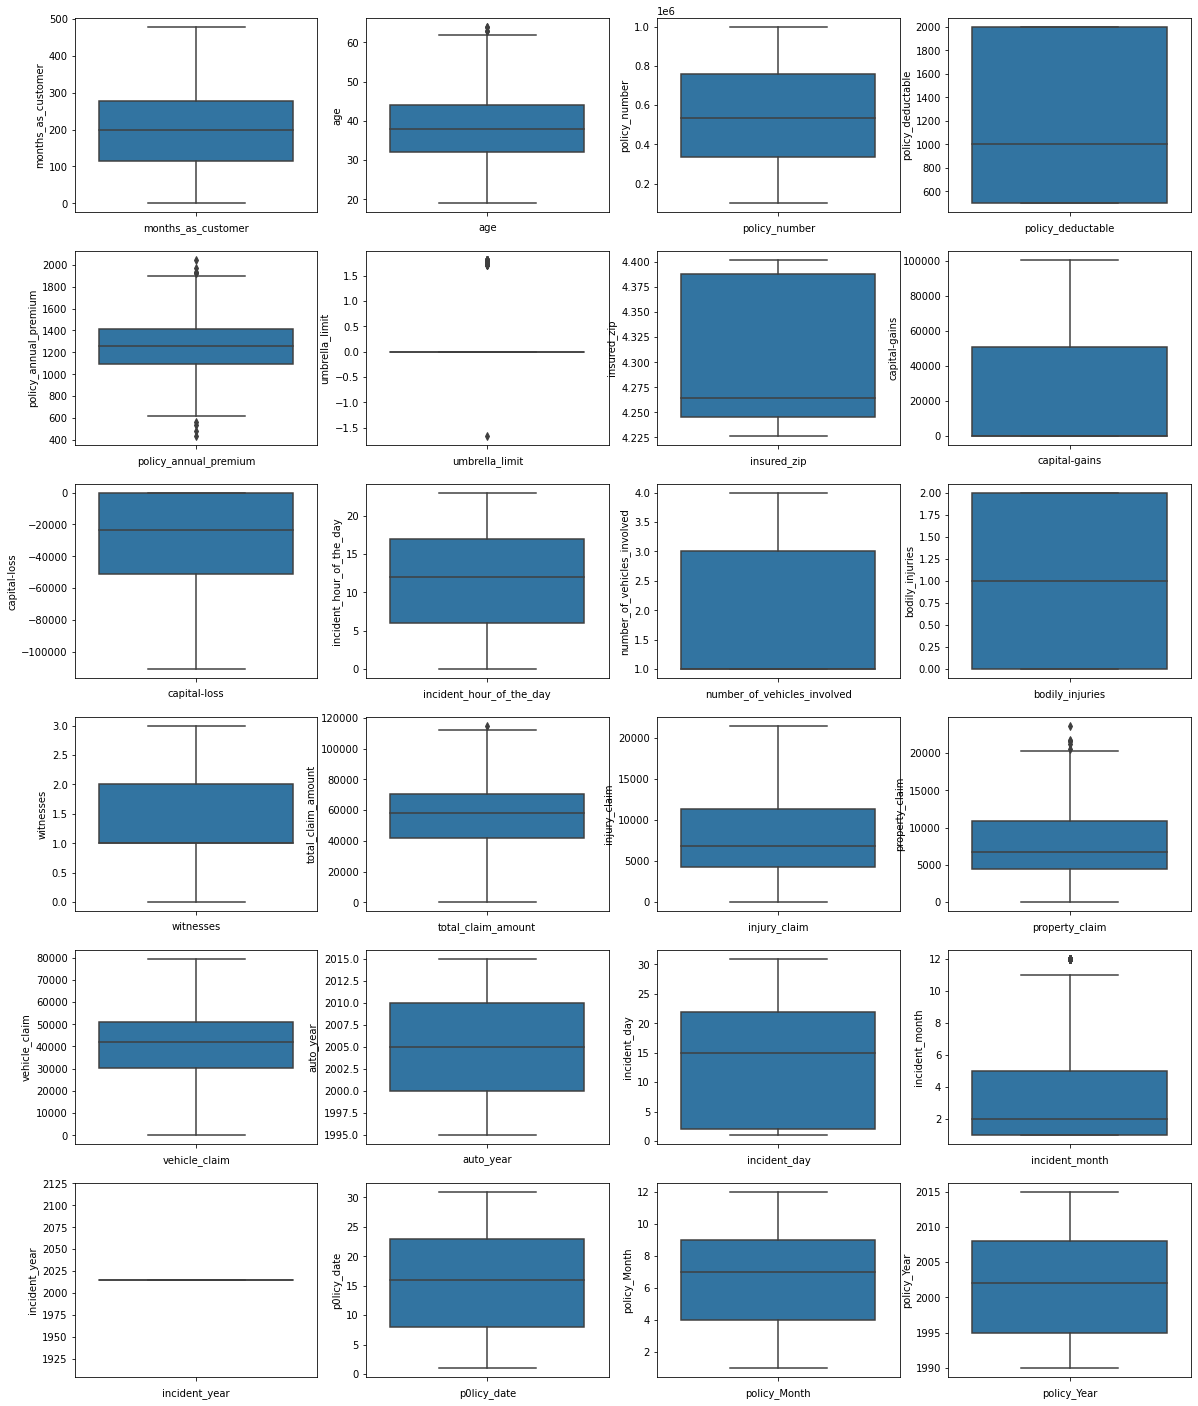

In [86]:

plt.figure(figsize=(20,25))
n=1
for i in numerical_cols:
    ax=plt.subplot(6,4,n)
    sns.boxplot(y=df[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

From the above we can observe outliers in age, policy_annual_premium,umbrella_limit,property_claim.

In [87]:
from scipy.stats import zscore
cols=['age','policy_annual_premium','umbrella_limit','property_claim']

df1=pd.DataFrame()

zscore=np.abs(zscore(df[cols]))
df1=df[(zscore<3).all(axis=1)]
df1.shape

(996, 43)

Let's encode categorical columns in the dataset.

In [88]:
for i in categorical_cols:
    print(i)
    print(df1[i].unique())
    print('------------------------------------')

policy_state
['OH' 'IN' 'IL']
------------------------------------
policy_csl
['250/500' '100/300' '500/1000']
------------------------------------
insured_sex
['MALE' 'FEMALE']
------------------------------------
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
------------------------------------
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
------------------------------------
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
------------------------------------
insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-i

From the above we can observe '?' in features 'property_damage','police_report_available','collision_type'. Let's replace '?' with unknown.

In [89]:
df1['property_damage']=df1['property_damage'].replace('?','unknown')

In [90]:
df1['police_report_available']=df1['police_report_available'].replace('?','unknown')
df1['collision_type']=df1['collision_type'].replace('?','unknown')

In [91]:
for i in categorical_cols:
    print(i)
    print(df1[i].unique())
    print('------------------------------------')

policy_state
['OH' 'IN' 'IL']
------------------------------------
policy_csl
['250/500' '100/300' '500/1000']
------------------------------------
insured_sex
['MALE' 'FEMALE']
------------------------------------
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
------------------------------------
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
------------------------------------
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
------------------------------------
insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-i

In [92]:
df1['incident_location'].value_counts()

9935 4th Drive         1
7976 Britain Drive     1
2352 MLK Drive         1
9734 2nd Ridge         1
3122 Apache Drive      1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 996, dtype: int64

As per my analysis, incident_location will not contribute for predicting target variable. Let's drop that feature.

In [93]:
df1.drop('incident_location',axis=1,inplace=True)


In [94]:
categorical_cols.remove('incident_location')

In [95]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in categorical_cols:
    df1[i]=LE.fit_transform(df1[i])
    

In [96]:
for i in categorical_cols:
    print(i)
    print(df1[i].unique())
    print('------------------------------------')

policy_state
[2 1 0]
------------------------------------
policy_csl
[1 0 2]
------------------------------------
insured_sex
[1 0]
------------------------------------
insured_education_level
[4 6 0 5 2 1 3]
------------------------------------
insured_occupation
[ 2  6 11  1 12  9  7  8  3 10 13  5  0  4]
------------------------------------
insured_hobbies
[17 15  2  3  0  9  4  7 16 12 10 19 13  5 11 14  1 18  6  8]
------------------------------------
insured_relationship
[0 2 3 4 5 1]
------------------------------------
incident_type
[2 3 0 1]
------------------------------------
collision_type
[2 3 1 0]
------------------------------------
incident_severity
[0 1 2 3]
------------------------------------
authorities_contacted
[4 2 1 3 0]
------------------------------------
incident_state
[4 5 1 2 6 0 3]
------------------------------------
incident_city
[1 5 0 6 2 3 4]
------------------------------------
property_damage
[1 2 0]
------------------------------------
police_repor

Let's check correlation among features and labels.

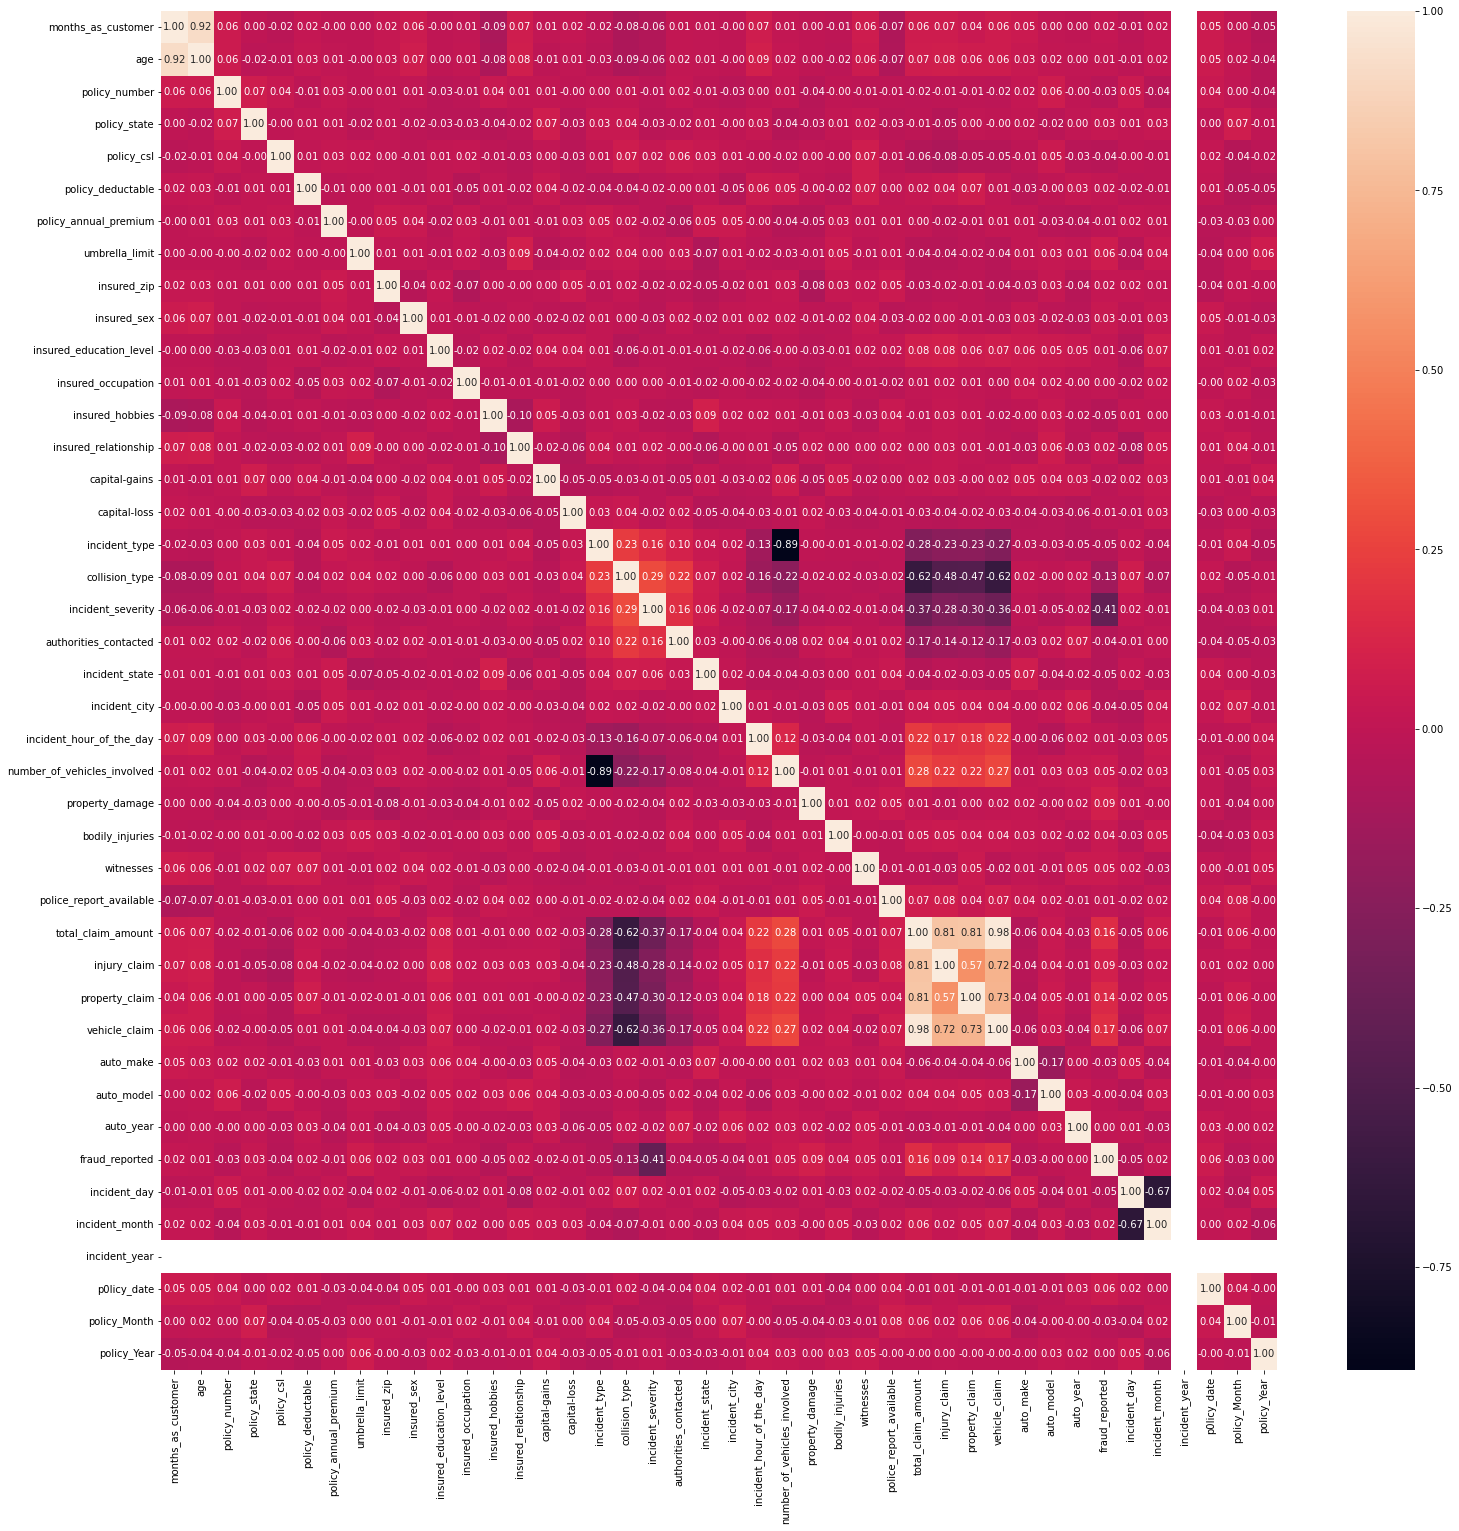

In [97]:
plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

from th above we can observe 'incident_year' is highly correlated. Let's drop that feature.

In [98]:
df1.drop('incident_year',axis=1,inplace=True)

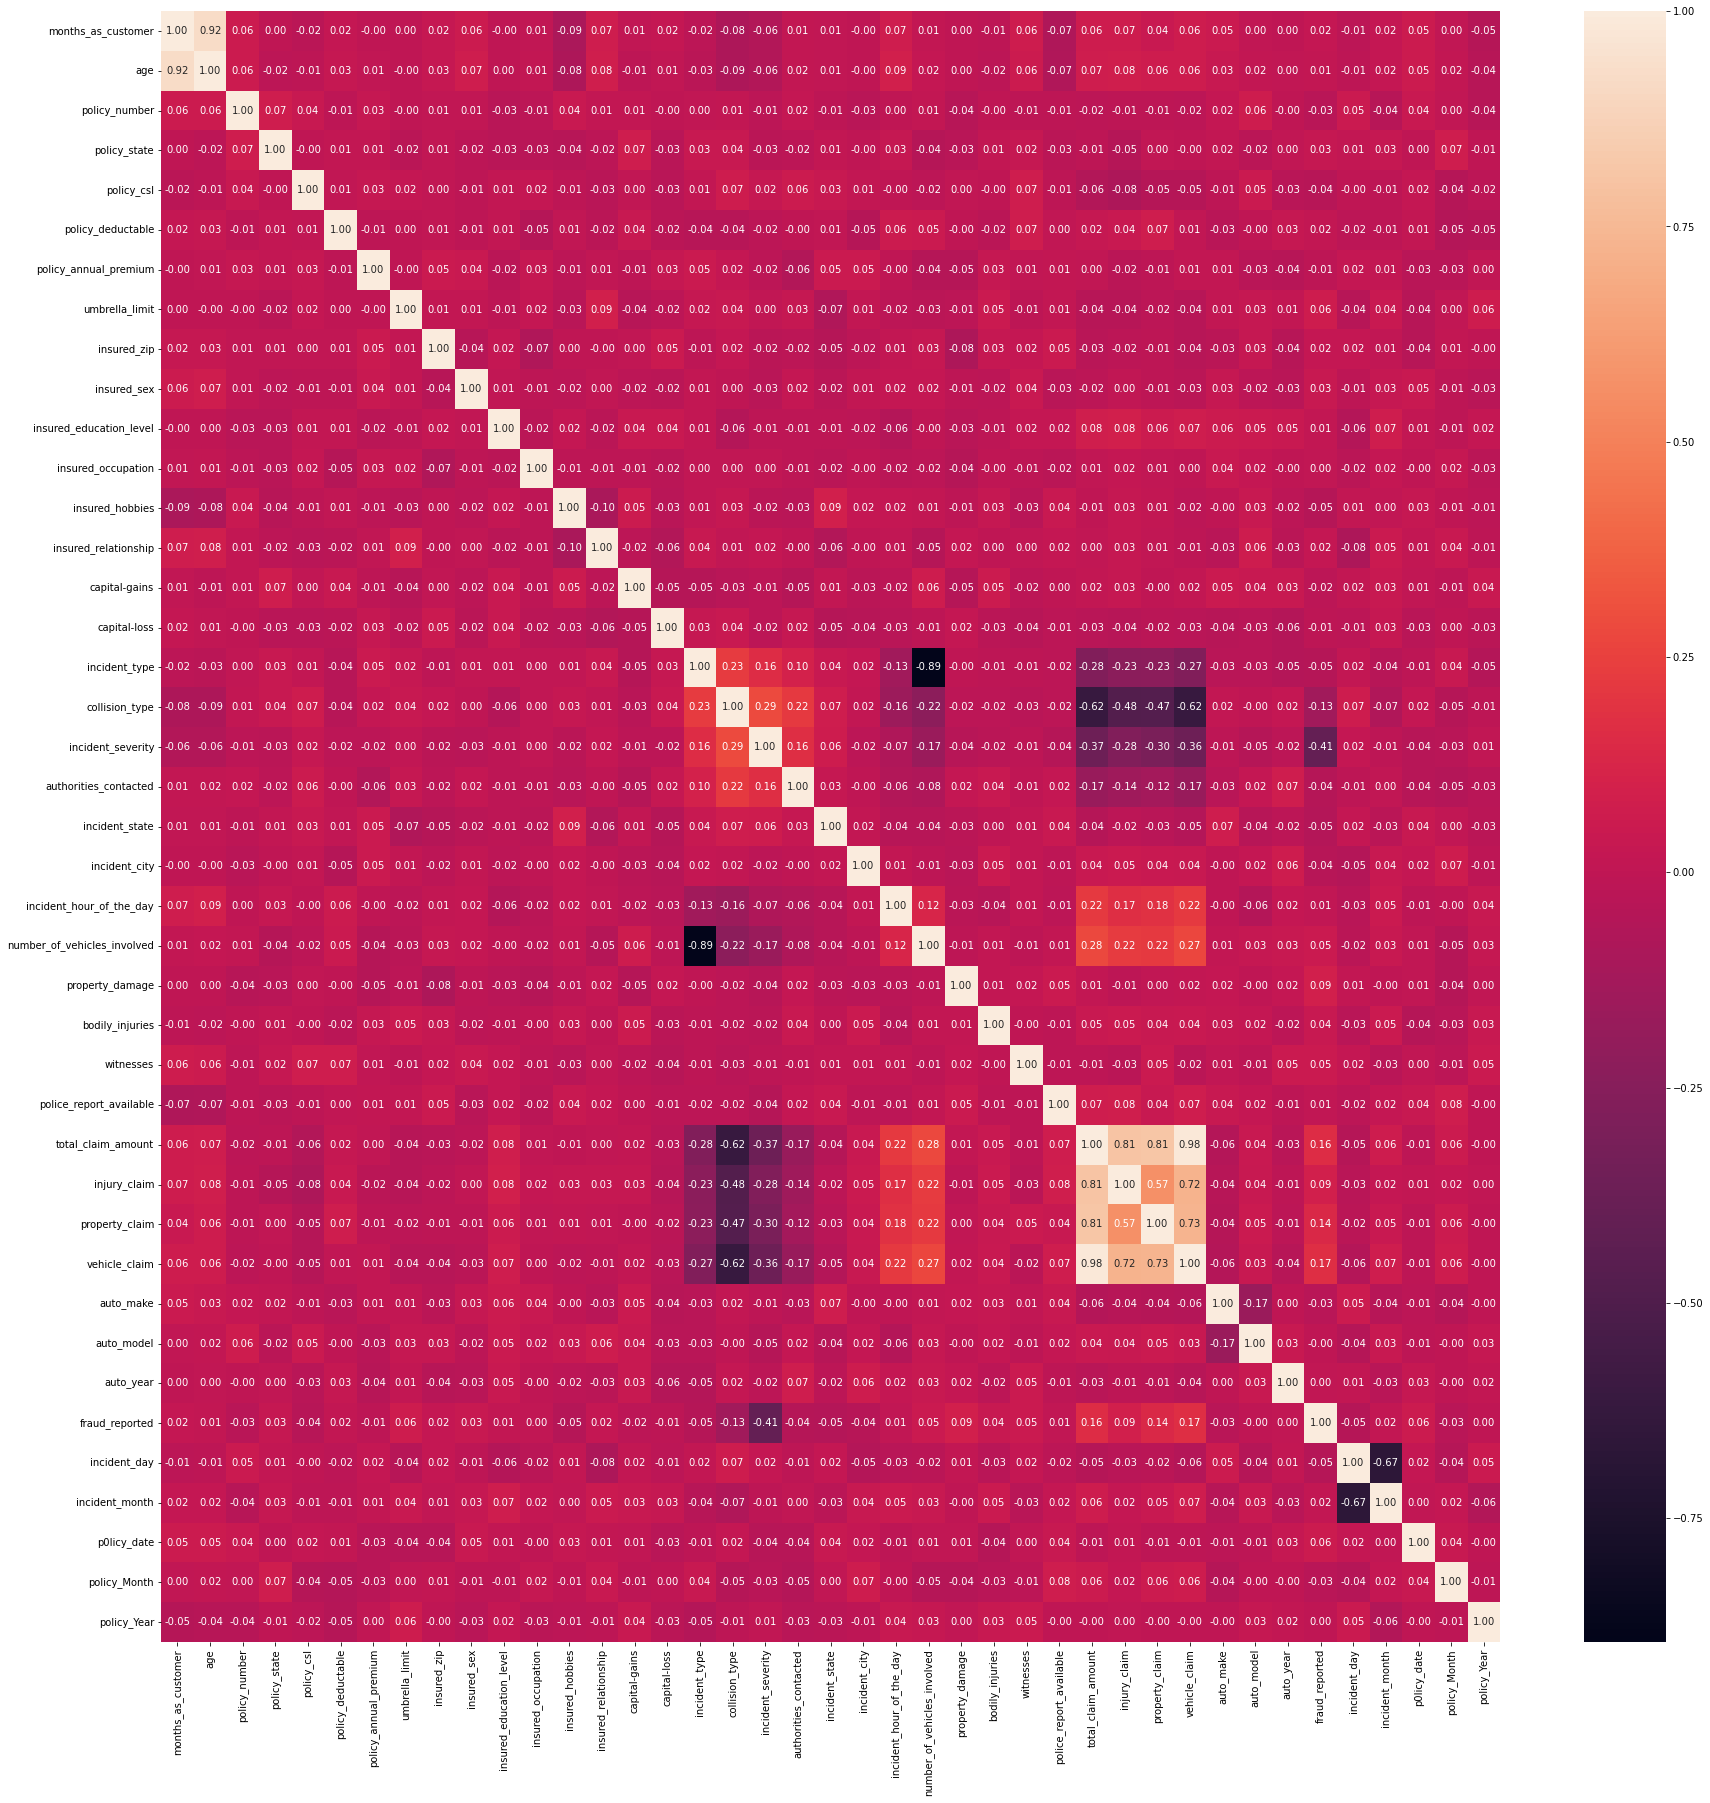

In [99]:
plt.figure(figsize=(30,30))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

From the above we can observe total_claim_amount,vehicle_claim,property_claim,injury claim features are highle correlated with each other.

As per my analysis from heatmap vehicle_claim is highly correlated with target. Let's drop 'total_claim_amount', property_claim', 'injury_claim' features.

In [104]:
df1.drop(columns=['total_claim_amount','property_claim','injury_claim'],axis=1,inplace=True)

In [105]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=df1.drop('fraud_reported',axis=1)
y=df1['fraud_reported']

x_scaled=scaler.fit_transform(x)

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF=pd.DataFrame()
VIF['features']=x.columns
VIF['value']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
VIF

,features,value
0,months_as_customer,6.804466
1,age,6.801211
2,policy_number,1.032501
3,policy_state,1.038757
4,policy_csl,1.028371
5,policy_deductable,1.030850
6,policy_annual_premium,1.032937
7,umbrella_limit,1.031564
8,insured_zip,1.041299
9,insured_sex,1.030183


From the above we can observe VIF value for 'months_as_customer','age','incident_type','number_of_vehicles_involved' are high. Let's drop these features. 

In [107]:
x.drop(['months_as_customer','age','incident_type','number_of_vehicles_involved'],axis=1,inplace=True)
x_scaled=scaler.fit_transform(x)

In [108]:
VIF=pd.DataFrame()
VIF['features']=x.columns
VIF['value']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
VIF

,features,value
0,policy_number,1.027870
1,policy_state,1.034509
2,policy_csl,1.026739
3,policy_deductable,1.028351
4,policy_annual_premium,1.029079
5,umbrella_limit,1.031078
6,insured_zip,1.036836
7,insured_sex,1.020803
8,insured_education_level,1.040714
9,insured_occupation,1.021204


Now VIF values of all features are in range. Let's continue futher processing.

In [109]:
y.value_counts()

0    750
1    246
Name: fraud_reported, dtype: int64

From the above we can observe there is class imbalance probelm.

In [110]:
from imblearn.over_sampling import SMOTE

SM=SMOTE()
x,y=SM.fit_resample(x,y)

y.value_counts()

1    750
0    750
Name: fraud_reported, dtype: int64

In [111]:
df1.shape

(996, 38)

In [115]:
x_scaled=scaler.fit_transform(x)

Let's find best Random State.

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [116]:
max_acc=0
max_rand_state=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_predict=RFC.predict(x_test)
    acc_score=accuracy_score(y_test,y_predict)
    if(acc_score>max_acc):
        max_acc=acc_score
        max_rand_state=i
        
print("Best Random State - ",max_rand_state," Accuracy score - ",max_acc)        

Best Random State -  1  Accuracy score -  0.9066666666666666


In [117]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=1)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier

In [119]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
acc_score_LR=accuracy_score(y_test,y_predict_LR)
print("Accuracy Score ",acc_score_LR)

Accuracy Score  0.8453333333333334


In [120]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_predict_DTC=DTC.predict(x_test)
acc_score_DTC=accuracy_score(y_test,y_predict_DTC)
print("Accuracy Score ",acc_score_DTC)

Accuracy Score  0.8186666666666667


In [121]:
Knn=KNeighborsClassifier()
Knn.fit(x_train,y_train)
y_predict_Knn=Knn.predict(x_test)
acc_score_Knn=accuracy_score(y_test,y_predict_Knn)
print("Accuracy Score ",acc_score_Knn)

Accuracy Score  0.728


In [122]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_predict_ABC=ABC.predict(x_test)
acc_score_ABC=accuracy_score(y_test,y_predict_ABC)
print("Accuracy Score ",acc_score_ABC)

Accuracy Score  0.8666666666666667


In [123]:
GDT=GradientBoostingClassifier()
GDT.fit(x_train,y_train)
y_predict_GDT=GDT.predict(x_test)
acc_score_GDT=accuracy_score(y_test,y_predict_GDT)
print("Accuracy Score ",acc_score_GDT)

Accuracy Score  0.888


In [124]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
y_predict_BC=BC.predict(x_test)
acc_score_BC=accuracy_score(y_test,y_predict_BC)
print('Accuracy Score ',acc_score_BC)

Accuracy Score  0.864


In [125]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_predict_RFC=RFC.predict(x_test)
acc_score_RFC=accuracy_score(y_test,y_predict_RFC)
print("accuracy score :",acc_score_RFC)

accuracy score : 0.8986666666666666


In [126]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_predict_ETC=ETC.predict(x_test)
acc_score_ETC=accuracy_score(y_test,y_predict_ETC)
print("Accuracy Score ",acc_score_ETC)

Accuracy Score  0.9013333333333333


From the above we can ExtraTreesClassifier exhibits highest accuracy score of 90%. Let's check accuracy score provided by the model is due to overfitting of the model.

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

In [128]:
score=cross_val_score(RFC,x,y)
mean=score.mean()
print("Difference is ",acc_score_RFC-mean)

Difference is  0.03799999999999992


In [129]:
score=cross_val_score(LR,x,y)
mean=score.mean()
print("Difference is ",acc_score_LR-mean)

Difference is  0.28200000000000003


In [130]:
score=cross_val_score(Knn,x,y)
mean=score.mean()
print("Difference is ",acc_score_Knn-mean)

Difference is  0.04066666666666663


In [131]:
score=cross_val_score(DTC,x,y)
mean=score.mean()
print("Difference is ",acc_score_DTC-mean)

Difference is  0.018000000000000016


In [132]:
score=cross_val_score(ETC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ETC-mean)

Difference is  0.033333333333333326


In [133]:
score=cross_val_score(GDT,x,y)
mean=score.mean()
print("Difference is ",acc_score_GDT-mean)

Difference is  0.034666666666666734


In [134]:
score=cross_val_score(ABC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ABC-mean)

Difference is  0.03533333333333344


In [135]:
score=cross_val_score(BC,x,y)
mean=score.mean()
print("Difference is ",acc_score_BC-mean)

Difference is  0.014000000000000012


From the above we can observe cross val score of DecisionTreeClassifier and BaggingClassifier. Accuracy score of BaggingClassifier is high. Let's consider this as best model for the dataset.
Let's generate classification_report and confusion_matrix.

In [136]:
from sklearn.metrics import confusion_matrix,classification_report

In [137]:
print("confusion_matrix\n",confusion_matrix(y_test,y_predict_BC))

confusion_matrix
 [[163  26]
 [ 25 161]]


In [138]:
print("classification report \n",classification_report(y_test,y_predict_BC))

classification report 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       189
           1       0.86      0.87      0.86       186

    accuracy                           0.86       375
   macro avg       0.86      0.86      0.86       375
weighted avg       0.86      0.86      0.86       375



Let's tune parameters and try to increase performance of the model.

In [140]:
from sklearn.model_selection import GridSearchCV

In [ ]:
base_estimator=None,
    n_estimators=10,
    *,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,

In [ ]:
BaggingClassifier()

In [145]:
param={'n_estimators':[10,11,12,13],'max_samples':[1,2,3],'max_features':[1,2,3],'random_state':[1,2,3,4,5,6,7]}

In [146]:
GSV=GridSearchCV(BC,param_grid=param,n_jobs=-1)
GSV.fit(x_train,y_train)
GSV.best_params_

{'max_features': 2, 'max_samples': 3, 'n_estimators': 13, 'random_state': 7}

In [153]:
Best_model=BaggingClassifier(max_features=32,max_samples=1100,n_estimators=25)
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
acc_score=accuracy_score(y_test,y_predict)
print('Accuracy score', acc_score)

Accuracy score 0.88


After tuning parameters accuracy score increased to 88%.

Let's generate classification_report and confusion_matrix.

In [155]:
print("confusion_matrix\n",confusion_matrix(y_test,y_predict))

confusion_matrix
 [[164  25]
 [ 20 166]]


In [157]:
print("classification report \n",classification_report(y_test,y_predict))

classification report 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       189
           1       0.87      0.89      0.88       186

    accuracy                           0.88       375
   macro avg       0.88      0.88      0.88       375
weighted avg       0.88      0.88      0.88       375



Let's plot ROC curve.

In [158]:
from sklearn.metrics import roc_auc_score,roc_curve

In [159]:
fpr,tpr,treshold=roc_curve(y_test,y_predict)

In [160]:
print('fpr ',fpr)
print('tpr ',tpr)
print('treshold ',treshold)

fpr  [0.         0.13227513 1.        ]
tpr  [0.         0.89247312 1.        ]
treshold  [2 1 0]


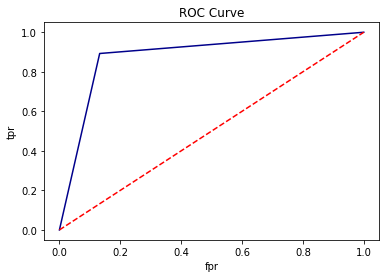

In [161]:
plt.plot(fpr,tpr,color='darkblue')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()


In [162]:
roc_auc=roc_auc_score(y_test,y_predict)
print('Area under the curve is ',roc_auc)

Area under the curve is  0.8800989930022188
